# Examine Horses2Zebra Dataset

## Import Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp '/content/drive/My Drive/App/CycleGAN/horse2zebra.zip' /content

In [0]:
!unzip -q /content/horse2zebra.zip

### Examine the data

In [4]:
!ls -l /content/horse2zebra/trainA | wc -l
!ls -l /content/horse2zebra/trainB | wc -l

# test
!ls -l /content/horse2zebra/testA | wc -l
!ls -l /content/horse2zebra/testB | wc -l

1068
1335
121
141


## General Imports

In [0]:
import numpy as np
import os
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

## Configurations

In [0]:
DATA_LOCATION = '/content/horse2zebra'
TRAIN_A_LOC = os.path.join(DATA_LOCATION, 'trainA')
TRAIN_B_LOC = os.path.join(DATA_LOCATION, 'trainB')

## Utilities

In [0]:
#get file names
def get_file_names(location):
  file_list = os.listdir(location)
  res_file_list = [os.path.join(location, file) for file in file_list]
  return res_file_list

In [0]:
# get image data
def get_sample_images(location, num_images):
  file_list = os.listdir(location)
  # examine  samples
  idx_arr = np.random.randint(0, len(file_list), num_images)

  image_list = []
  for idx in idx_arr:
    file_loc = os.path.join(location, file_list[idx])
    im = Image.open(file_loc)
    image_list.append(np.asarray(im))
    
  return(image_list)

In [0]:
# display n images
def display_images(images, num_rows, num_cols):
  #
  fig, axes = plt.subplots(num_rows, num_cols )#, figsize=(5,5))
  #
  for row in range(0,num_rows):
    for col in range(0,num_cols):
      axes[row, col].imshow(images[row*num_cols+col])
      axes[row,col].axis('off')

  #plt.tight_layout()
  plt.show()
  

### Examine trainA data

In [0]:
trainA_files = os.listdir(TRAIN_A_LOC)

In [8]:
len(trainA_files)

1067

In [9]:
trainA_files[0]

'n02381460_1711.jpg'

In [0]:
# examine 20 samples
idx_arr = np.random.randint(0, len(trainA_files), 20)

trainA_image_list = []
for idx in idx_arr:
  file_loc = os.path.join(TRAIN_A_LOC, trainA_files[idx])
  im = Image.open(file_loc)
  trainA_image_list.append(np.asarray(im))
  

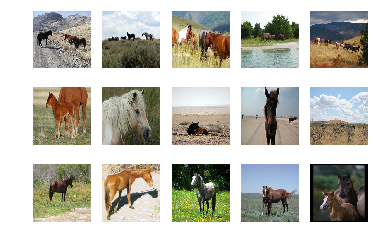

In [14]:
## Display the images.

NUM_ROWS = 3
NUM_COLS = 5
fig, axes = plt.subplots(NUM_ROWS, NUM_COLS )#, figsize=(5,5))
for row in range(0,NUM_ROWS):
  for col in range(0,NUM_COLS):
    axes[row, col].imshow(trainA_image_list[row*NUM_COLS+col])
    axes[row,col].axis('off')
    
#plt.tight_layout()
plt.show()

In [15]:
trainA_image_list[0].shape

(256, 256, 3)

## Examine train B data

In [0]:
trainB_samples = get_sample_images(TRAIN_B_LOC, 20)

In [23]:
len(trainB_samples)

20

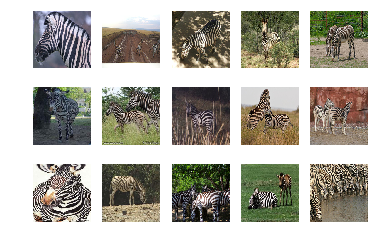

In [24]:
display_images(trainB_samples, 3, 5)

In [25]:
trainB_samples[0].shape

(256, 256, 3)

## Examine testA images

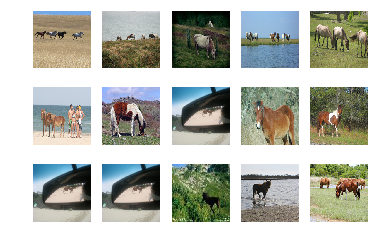

In [26]:
testA_samples = get_sample_images(os.path.join(DATA_LOCATION, 'testA'), 20)
display_images(testA_samples, 3, 5)

In [27]:
testA_samples[0].shape

(256, 256, 3)

## Examine testB images

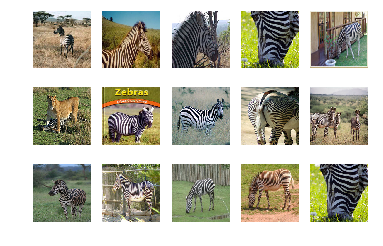

In [28]:
testB_samples = get_sample_images(os.path.join(DATA_LOCATION,'testB'), 20)
display_images(testB_samples, 3, 5)

In [29]:
testB_samples[0].shape

(256, 256, 3)

## Save images as Numpy Array.

To use it in colab, make the image resolution to 64x64x3.

In [0]:
file_list = get_file_names(TRAIN_A_LOC)

In [34]:
print(len(file_list))
file_list[0]

1067


'/content/horse2zebra/trainA/n02381460_1711.jpg'

In [0]:
IM_SIZE = 64
ImageData = []
for file in file_list: 
  im = Image.open(file).resize((IM_SIZE, IM_SIZE), Image.ANTIALIAS)
  ImageData.append(np.asarray(im))
  
np.save('/content/trainA.64.npy', ImageData)

In [0]:
trainB_file_list = get_file_names(TRAIN_B_LOC)

In [39]:
len(trainB_file_list)

1334

In [41]:
print(trainB_file_list[0])

/content/horse2zebra/trainB/n02391049_8373.jpg


In [0]:
!rm -rf /content/trainB.64.npy

In [0]:
IM_SIZE = 64
ImageData = []
for file in trainB_file_list: 
  im = Image.open(file).resize((IM_SIZE, IM_SIZE), Image.ANTIALIAS)
  ImageData.append(np.asarray(im))
  


In [49]:
for idx in range(0, len(ImageData)):
  shape = ImageData[idx].shape
  # find len of tuple
  if ( len(shape) ==2):
    print(idx)

46
286
717
824
1090
1148
1282


In [0]:
IM_SIZE = 64
ImageData = []
for file in trainB_file_list: 
  im = Image.open(file).resize((IM_SIZE, IM_SIZE), Image.ANTIALIAS)
  
  im_arr = np.asarray(im)
  
  # for time being, ignore the black and white images
  if (len(im_arr.shape) != 2) :
    ImageData.append(np.asarray(im))

In [0]:
np.save('/content/trainB.64.npy', ImageData)

In [53]:
!ls -l /content/*.npy

-rw-r--r-- 1 root root 13111424 Aug  3 11:12 /content/trainA.64.npy
-rw-r--r-- 1 root root 16306304 Aug  3 11:29 /content/trainB.64.npy


In [54]:
!zip /content/trainA.64.zip /content/trainA.64.npy
!zip /content/trainB.64.zip /content/trainB.64.npy

  adding: content/trainA.64.npy (deflated 11%)
  adding: content/trainB.64.npy (deflated 10%)


In [56]:
!ls -l /content/*.zip

-rw------- 1 root root 116867962 Aug  3 10:45 /content/horse2zebra.zip
-rw-r--r-- 1 root root  11627297 Aug  3 11:31 /content/trainA.64.zip
-rw-r--r-- 1 root root  14691603 Aug  3 11:31 /content/trainB.64.zip


In [0]:
!cp /content/trainA.64.zip '/content/drive/My Drive/App/CycleGAN'
!cp /content/trainB.64.zip '/content/drive/My Drive/App/CycleGAN'